In [86]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns


In [87]:
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Input/Mall Customer'

file_names = os.listdir(folder_path)

if os.path.exists(folder_path):
    file_names = os.listdir(folder_path)
    print("Files in folder:")
    for file_name in file_names:
        print(file_name)
else:
    print(f"Folder not found: {folder_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder:
Mall_Customers.csv


In [88]:
df_customer=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input/Mall Customer/Mall_Customers.csv')

In [89]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
df_customer.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [91]:
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df_customer.columns = df_customer.columns.str.lower().str.replace(" ", "_")

print(df_customer)

     customerid  gender  age  annual_income_(k$)  spending_score_(1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# Segmentation Using Age & Spending Score

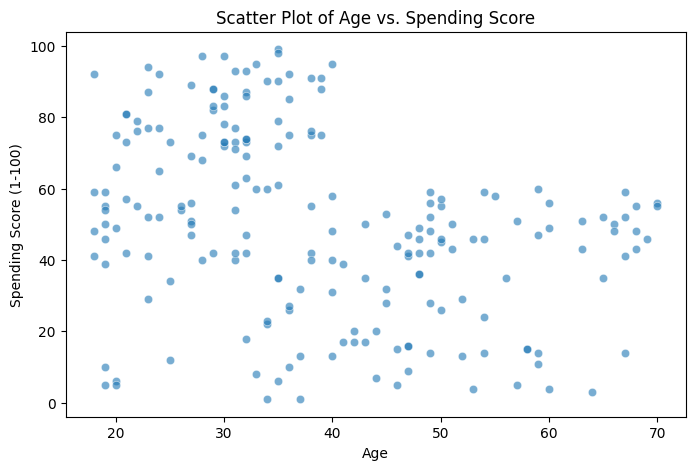

In [93]:
X1 = df_customer[['age', 'spending_score_(1-100)']]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_customer['age'], y=df_customer['spending_score_(1-100)'], alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs. Spending Score')

plt.show()

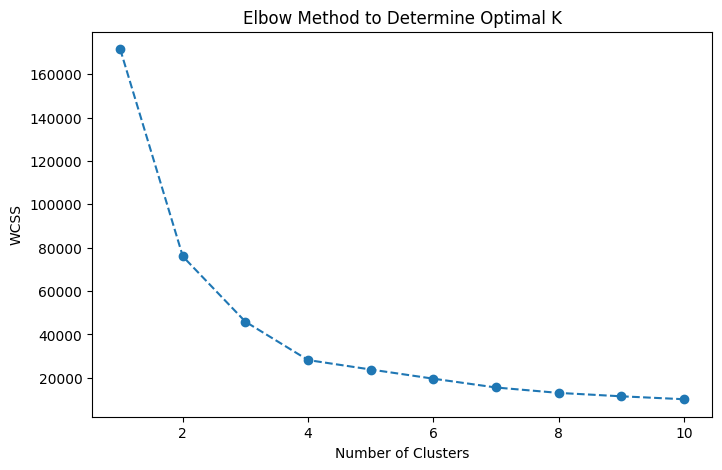

In [94]:
#手肘法
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

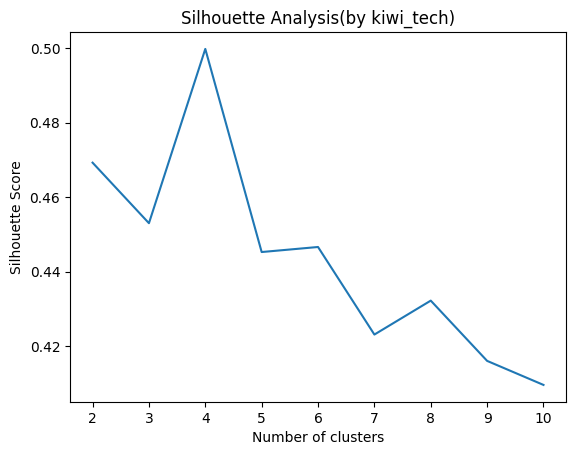

In [95]:
# 輪廓分析法
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    silhouette_scores.append(silhouette_score(X1, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis(by kiwi_tech)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

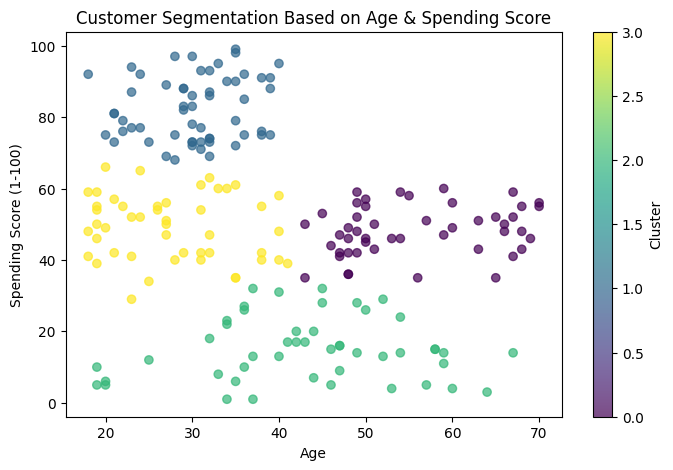

     age  spending_score_(1-100)  Cluster1
0     19                      39         3
1     21                      81         1
2     20                       6         2
3     23                      77         1
4     31                      40         3
..   ...                     ...       ...
195   35                      79         1
196   45                      28         2
197   32                      74         1
198   32                      18         2
199   30                      83         1

[200 rows x 3 columns]


In [96]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_customer['Cluster1'] = kmeans.fit_predict(X1)

plt.figure(figsize=(8,5))
plt.scatter(df_customer['age'], df_customer['spending_score_(1-100)'],
            c=df_customer['Cluster1'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Based on Age & Spending Score')
plt.colorbar(label='Cluster')
plt.show()

print(df_customer[['age', 'spending_score_(1-100)', 'Cluster1']])

# Segmentation Using Annual Income & Spending Score

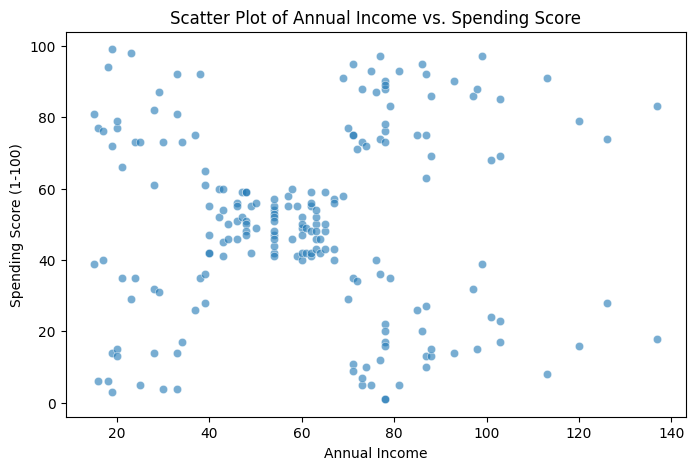

In [97]:
X2 = df_customer[['annual_income_(k$)', 'spending_score_(1-100)']]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_customer['annual_income_(k$)'], y=df_customer['spending_score_(1-100)'], alpha=0.6)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')

plt.show()

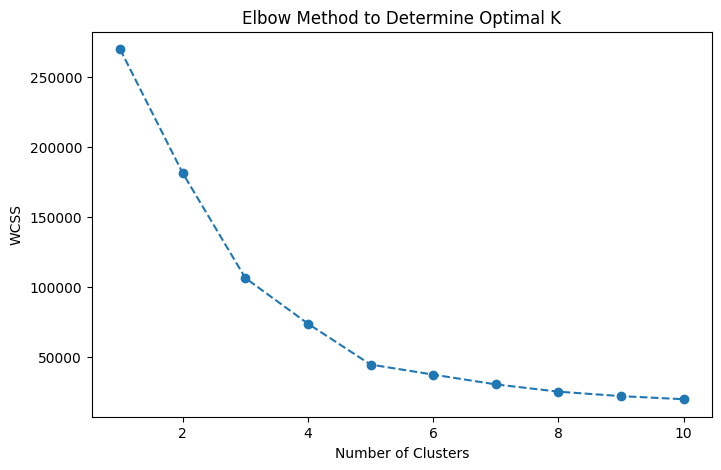

In [98]:
#手肘法
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

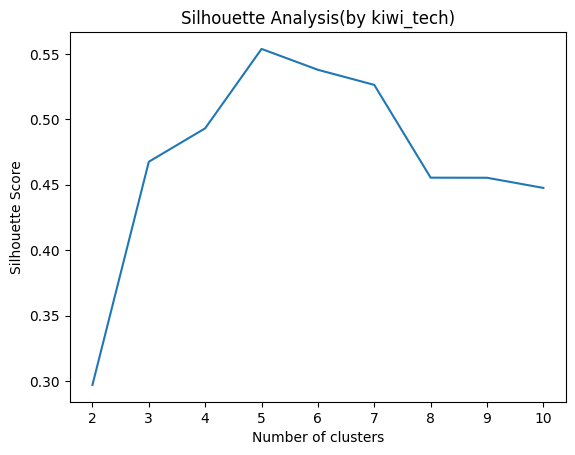

In [99]:
# 輪廓分析法
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    silhouette_scores.append(silhouette_score(X2, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis(by kiwi_tech)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

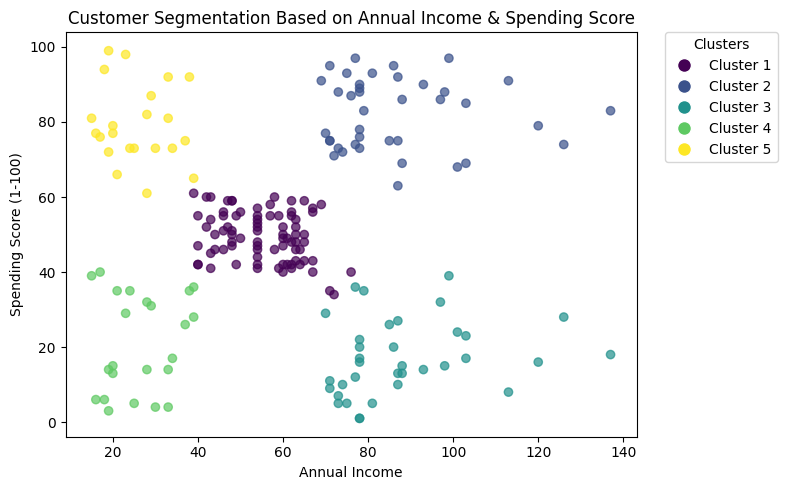

     annual_income_(k$)  spending_score_(1-100)  Cluster2
0                    15                      39         3
1                    15                      81         4
2                    16                       6         3
3                    16                      77         4
4                    17                      40         3
..                  ...                     ...       ...
195                 120                      79         1
196                 126                      28         2
197                 126                      74         1
198                 137                      18         2
199                 137                      83         1

[200 rows x 3 columns]


In [100]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_customer['Cluster2'] = kmeans.fit_predict(X2)

plt.figure(figsize=(8,5))
scatter = plt.scatter(df_customer['annual_income_(k$)'], df_customer['spending_score_(1-100)'],
                      c=df_customer['Cluster2'], cmap='viridis', alpha=0.7)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Based on Annual Income & Spending Score')

legend_labels = [f'Cluster {i+1}' for i in range(5)]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10)
           for i in range(5)]

plt.legend(handles, legend_labels, title="Clusters", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()

plt.show()

print(df_customer[['annual_income_(k$)', 'spending_score_(1-100)', 'Cluster2']])
